# Dimensionality Reduction

> Weitong Zhang
> 2015011493
>
> <zwt15@mails.tsinghua.edu.cn>

## Programming

- N shape data set and dimensionality reduction with ISOMAP

    The data set could be build up using the api of sklearn `sklearn.datasets.make_s_curve` and some other basic transformations

- LLE method and Isomap method

    Thanks to the api of sklearn, we have `sklearn.manifold.Isomap` and `sklearn.manifold.LocallyLinearEmbedding` method

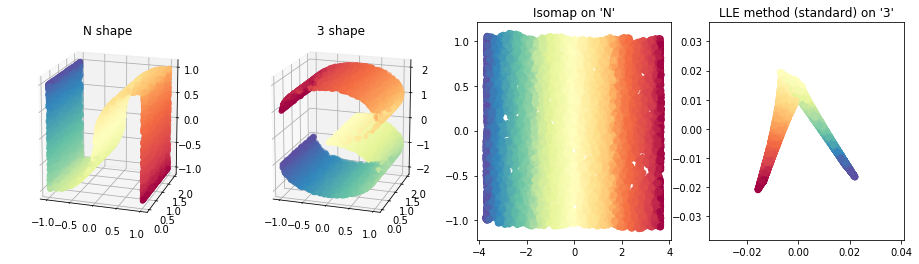

In [2]:
from sklearn.datasets.samples_generator import make_s_curve as original_s
from sklearn.manifold import Isomap, LocallyLinearEmbedding as LLE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_points = 10000
X, color = original_s(n_points, random_state=0)

# N shape
Nx = np.array(X[:,2])
Ny = np.array(X[:,1])
Nz = -np.array(X[:,0])

Nx[Nx < -1] = -1
Nx[Nx > 1] = 1

N = np.vstack((Nx,Ny,Nz))
# 3 shape

Tx = np.array(X[:,0])
Ty = np.array(X[:,1])
Tz = np.array(X[:,2])
Tx[color < 0] = - Tx[color < 0]

T = np.vstack((Tx,Ty,Tz))


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(141, projection='3d')
ax.scatter(Nx,Ny,Nz, c=color, cmap=plt.cm.Spectral)
ax.view_init(16, -72)
plt.title('N shape')

ax = fig.add_subplot(142,projection='3d')
ax.scatter(Tx,Ty,Tz, c=color, cmap=plt.cm.Spectral)
ax.view_init(16, -72)
plt.title('3 shape')

# Isomap method on 'N'

n_neighbors = 10
n_components = 2
Ny = Isomap(n_neighbors, n_components).fit_transform(N.T)

ax = fig.add_subplot(143)
ax.scatter(Ny[:,0],Ny[:,1],c=color, cmap=plt.cm.Spectral)
plt.title('Isomap on \'N\'')

# LLE method on '3'
Ty = LLE(n_neighbors, n_components).fit_transform(T.T)

ax = fig.add_subplot(144)
ax.scatter(Ty[:,0],Ty[:,1],c=color, cmap=plt.cm.Spectral)
plt.title('LLE method (standard) on \'3\'')
plt.show()